In [78]:

import pandas as pd
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
import os


In [41]:

df = pd.read_csv('D:\Amazon_Music\single_genre_artists.csv')
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [42]:
df.shape


(95837, 23)

In [43]:
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [45]:
df.isnull().sum()


id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [46]:
cols_drop = [
    'id_songs', 'name_song', 'id_artists',
    'release_date', 'name_artists', 'genres'
]
df_clean = df.drop(columns=cols_drop)
df_reference = df[['id_songs', 'name_song', 'name_artists', 'genres']].copy()

In [47]:
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

In [48]:
df_features = df_clean[audio_features]


In [49]:
print("Shape of features dataset:", df_features.shape)
print("Columns used for clustering:", df_features.columns.tolist())
print("Summary statistics:")
print(df_features.describe())

Shape of features dataset: (95837, 10)
Columns used for clustering: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Summary statistics:
       danceability        energy      loudness   speechiness  acousticness  \
count  95837.000000  95837.000000  95837.000000  95837.000000  95837.000000   
mean       0.586853      0.541083    -10.157862      0.168832      0.458989   
std        0.155422      0.236304      4.748798      0.275417      0.330416   
min        0.000000      0.000020    -50.174000      0.000000      0.000000   
25%        0.488000      0.365000    -12.723000      0.034100      0.133000   
50%        0.605000      0.542000     -9.397000      0.046200      0.453000   
75%        0.700000      0.727000     -6.692000      0.103000      0.759000   
max        0.991000      1.000000      5.376000      0.968000      0.996000   

       instrumentalness      liveness       valence         tem

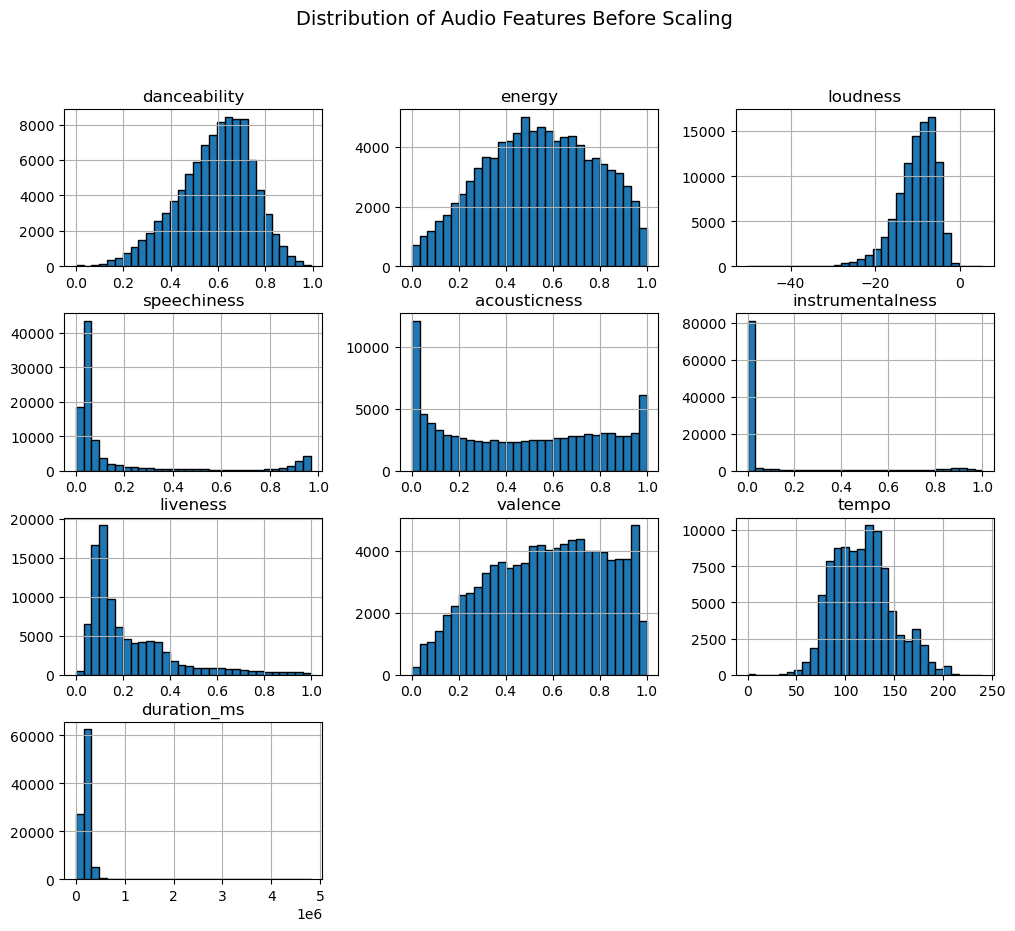

In [50]:

df_features.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Audio Features Before Scaling", fontsize=14)
plt.show()

In [51]:

standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(df_features),
    columns=df_features.columns
)

In [52]:
print("Summary statistics after Standard Scaling:")
print(df_standard_scaled.describe().T)

Summary statistics after Standard Scaling:
                    count          mean       std       min       25%  \
danceability      95837.0  2.746173e-16  1.000005 -3.775894 -0.636036   
energy            95837.0  5.456759e-17  1.000005 -2.289708 -0.745160   
loudness          95837.0  4.033257e-17  1.000005 -8.426626 -0.540169   
speechiness       95837.0 -4.982259e-17  1.000005 -0.613010 -0.489197   
acousticness      95837.0  2.277604e-16  1.000005 -1.389130 -0.986605   
instrumentalness  95837.0 -4.033257e-17  1.000005 -0.353405 -0.353405   
liveness          95837.0 -3.796007e-17  1.000005 -1.210346 -0.672214   
valence           95837.0  3.914632e-17  1.000005 -2.314486 -0.791058   
tempo             95837.0 -2.075941e-16  1.000005 -3.893307 -0.752259   
duration_ms       95837.0 -5.219509e-17  1.000005 -1.718520 -0.436503   

                       50%       75%        max  
danceability      0.116758  0.728001   2.600334  
energy            0.003880  0.786775   1.942075  
lou

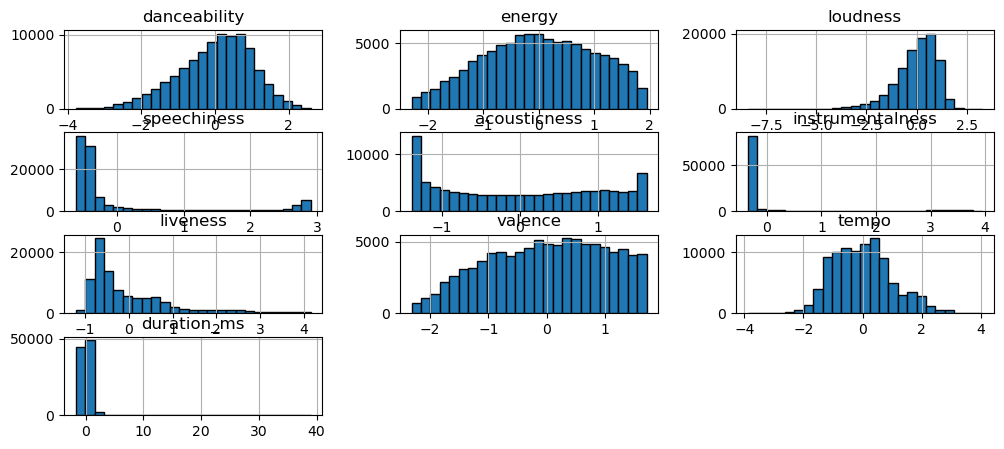

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_standard_scaled.hist(ax=axes[0], bins=25, edgecolor='black')
axes[0].set_title("After Standard Scaling")
plt.show()

Explained Variance by Each Principal Component:
  Principal Component  Explained Variance Ratio  Cumulative Variance
0                 PC1                  0.270796             0.270796
1                 PC2                  0.188214             0.459010
2                 PC3                  0.115536             0.574546
3                 PC4                  0.093634             0.668180
4                 PC5                  0.090168             0.758348
5                 PC6                  0.076807             0.835155
6                 PC7                  0.064152             0.899307
7                 PC8                  0.046249             0.945556
8                 PC9                  0.038531             0.984087
9                PC10                  0.015913             1.000000


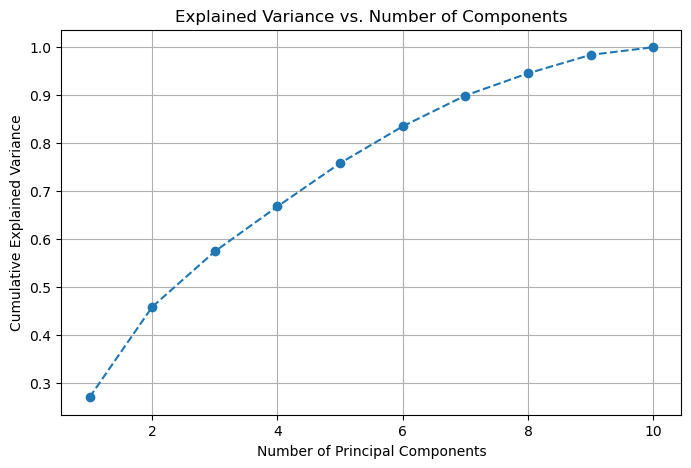

Shape after PCA Transformation: (95837, 9)


In [54]:
pca = PCA(n_components=None)  
pca.fit(df_standard_scaled)


explained_variance = pca.explained_variance_ratio_


pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()
})

print("Explained Variance by Each Principal Component:")
print(pca_variance_df)


plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance vs. Number of Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_standard_scaled)

print("Shape after PCA Transformation:", df_pca.shape)

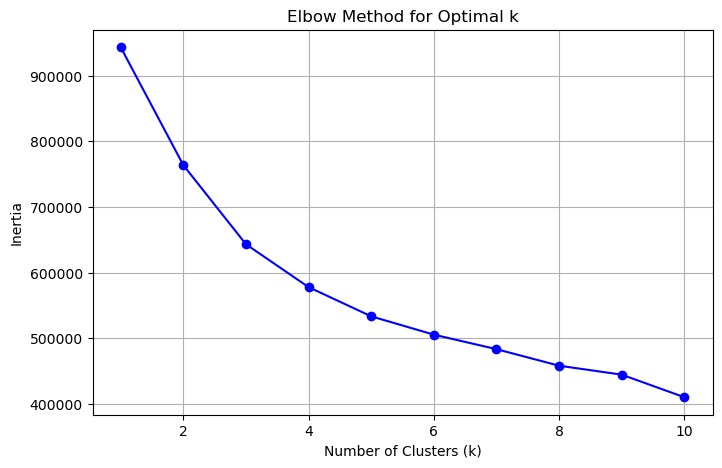


Cluster Distribution:
Cluster
2    46394
3    29166
1    12409
0     7868
Name: count, dtype: int64

Sample songs from each cluster:

Cluster 0:
                           name_song                    name_artists  \
53  Veux Tu Que J'te Fasse Un Dessin                        Georgius   
65                    West End Blues  Louis Armstrong & His Hot Five   
67                     Beau Koo Jack  Louis Armstrong & His Hot Five   
69                  Gut Bucket Blues  Louis Armstrong & His Hot Five   
70                   Skid-Dat-De-Dat  Louis Armstrong & His Hot Five   

                  genres  
53   ['vintage chanson']  
65  ['new orleans jazz']  
67  ['new orleans jazz']  
69  ['new orleans jazz']  
70  ['new orleans jazz']  

Cluster 1:
                        name_song name_artists               genres
37            Dites Moi Doumergue    Perchicot  ['vintage chanson']
43      Il N'osait Pas Se Decider     Georgius  ['vintage chanson']
50            L'amour Excuse Tout     Georg

In [55]:

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(df_pca)


df_reference['Cluster'] = kmeans.labels_

print("\nCluster Distribution:")
print(df_reference['Cluster'].value_counts())

print("\nSample songs from each cluster:")
for i in range(k_optimal):
    print(f"\nCluster {i}:")
    print(df_reference[df_reference['Cluster'] == i][['name_song', 'name_artists', 'genres']].head(5))

In [56]:


df_pca_df = pd.DataFrame(df_pca)

df_clustered = pd.concat([pd.DataFrame(df_standard_scaled, columns=df_features.columns), 
                          pd.Series(kmeans.labels_, name='Cluster')], axis=1)

cluster_profile = df_clustered.groupby('Cluster').mean().round(3)
print(cluster_profile)

         danceability  energy  loudness  speechiness  acousticness  \
Cluster                                                              
0              -0.654  -0.530    -0.801       -0.395         0.568   
1               0.498  -0.314    -0.681        2.417         0.384   
2               0.307   0.704     0.578       -0.333        -0.657   
3              -0.525  -0.843    -0.413       -0.392         0.729   

         instrumentalness  liveness  valence  tempo  duration_ms  
Cluster                                                           
0                   3.133    -0.196   -0.501 -0.107        0.193  
1                  -0.349     1.132    0.036 -0.571       -0.950  
2                  -0.263    -0.128    0.448  0.257        0.135  
3                  -0.278    -0.225   -0.593 -0.137        0.137  


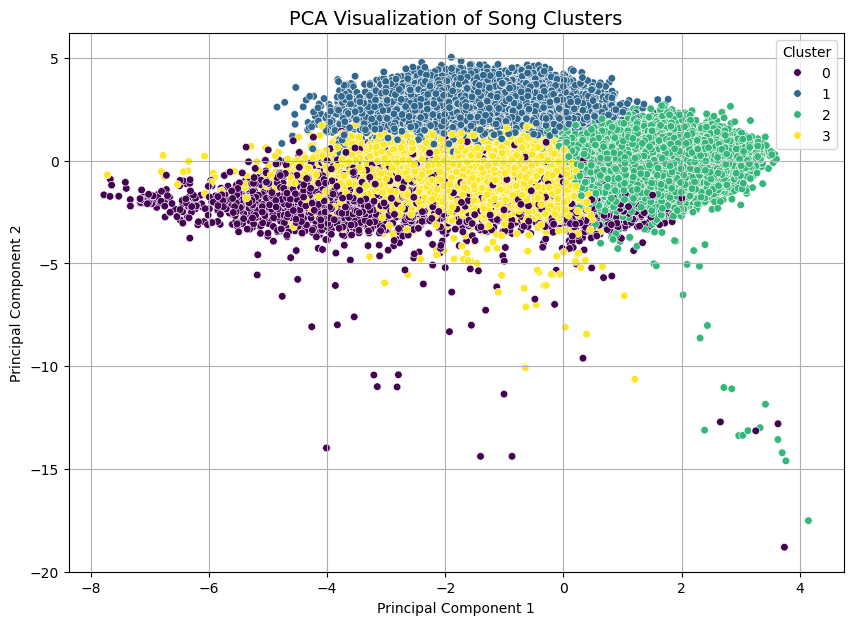

In [57]:

pca_df = pd.DataFrame(df_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_


plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=30)
plt.title("PCA Visualization of Song Clusters", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

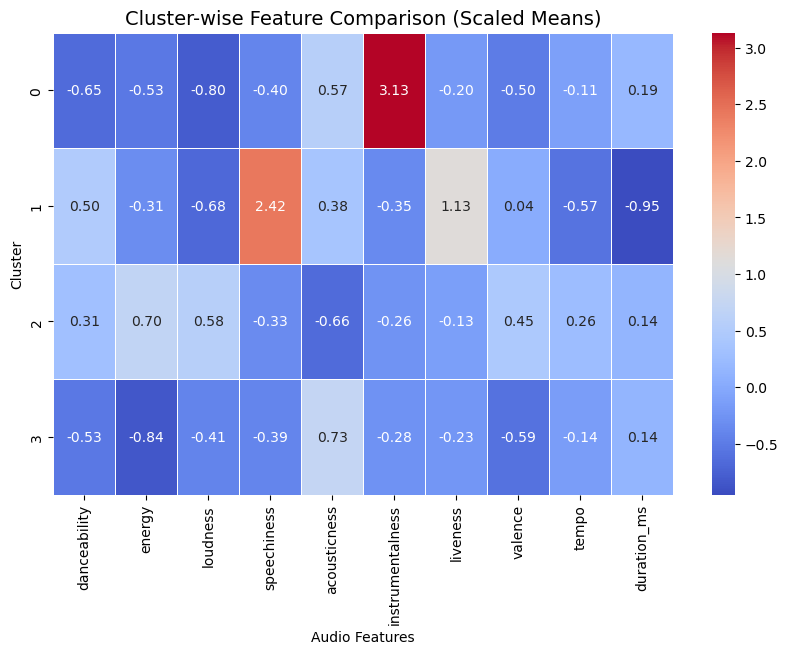

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Cluster-wise Feature Comparison (Scaled Means)", fontsize=14)
plt.xlabel("Audio Features")
plt.ylabel("Cluster")
plt.show()

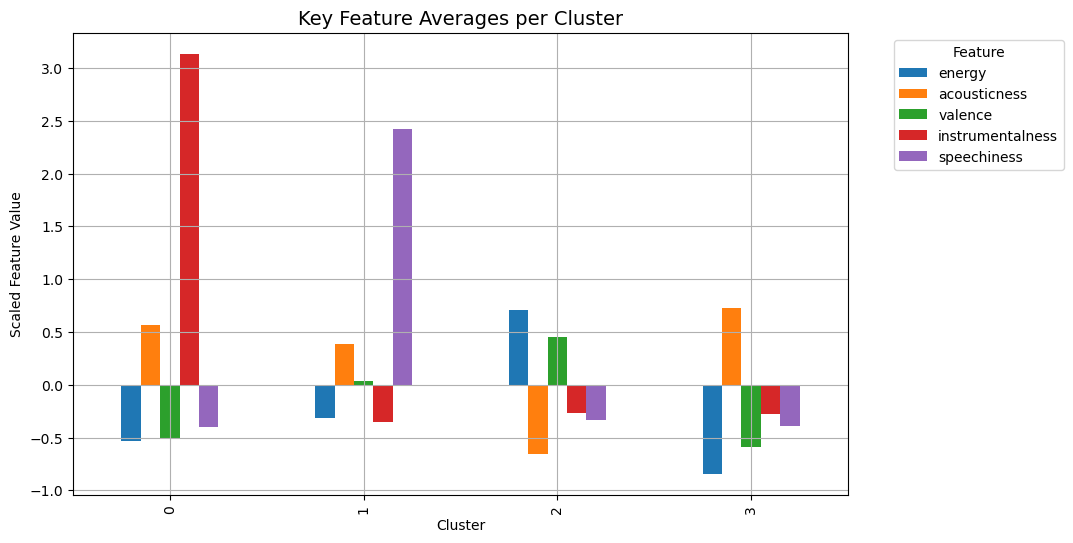

In [59]:
features_to_compare = ['energy', 'acousticness', 'valence', 'instrumentalness', 'speechiness']
cluster_profile[features_to_compare].plot(kind='bar', figsize=(10,6))
plt.title("Key Feature Averages per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Scaled Feature Value")
plt.grid(True)
plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [60]:
df_final = df_clustered.copy()


In [61]:
print(df_final.columns)


Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'Cluster'],
      dtype='object')


In [62]:
print(df_final.columns.tolist())


['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'Cluster']


In [63]:
feature_columns = ['danceability','energy','loudness','speechiness',
                   'acousticness','instrumentalness','liveness','valence',
                   'tempo','duration_ms']
cols_needed = ['id_songs','name_song','name_artists','genres','Cluster'] + feature_columns

available_cols = [c for c in cols_needed if c in df_final.columns]

df_export = df_final[available_cols]
df_export.to_csv("AmazonMusic_Clustered.csv", index=False)


In [64]:
df_final = df_final.rename(columns={'cluster': 'Cluster'})  # rename lowercase to match
df_export = pd.concat(
    [df[['id_songs', 'name_song', 'name_artists', 'genres']].reset_index(drop=True),
     df_final.reset_index(drop=True)],
    axis=1
)

df_export.to_csv("AmazonMusic_Clustered.csv", index=False)

print("✅ Exported with song details + features + Cluster")
print(df_export.head())

✅ Exported with song details + features + Cluster
                 id_songs         name_song name_artists               genres  \
0  0IA0Hju8CAgYfV1hwhidBH           La Java  Mistinguett  ['vintage chanson']   
1  1b8HZQCqcqwbzlA1jRTp6E          En Douce  Mistinguett  ['vintage chanson']   
2  5d5gQxHwYovxR5pqETOIAa     J'en Ai Marre  Mistinguett  ['vintage chanson']   
3  1EO65UEEPfy7CR0NK2sDxy  Ils n'ont pas ca  Mistinguett  ['vintage chanson']   
4  6a58gXSgqbIsXUhVZ6ZJqe         La belote  Mistinguett  ['vintage chanson']   

   danceability    energy  loudness  speechiness  acousticness  \
0     -0.153476 -1.511128 -0.757909    -0.427109      1.616187   
1     -1.028518 -1.528056 -1.098629    -0.369741      1.604081   
2     -0.488051 -1.418027 -1.127899    -0.398062      1.622240   
3      0.573581 -0.313510 -0.470677    -0.013914      1.610134   
4      0.406294 -1.028695 -0.768227    -0.111948      1.610134   

   instrumentalness  liveness   valence     tempo  duration_ms  Cl

In [65]:
df_final.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'Cluster'],
      dtype='object')

In [66]:
df_export.to_csv("AmazonMusic_Clustered.csv", index=False)
print("Exported final dataset with cluster labels successfully!")

Exported final dataset with cluster labels successfully!


In [67]:
df_export.columns


Index(['id_songs', 'name_song', 'name_artists', 'genres', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'Cluster'],
      dtype='object')

In [69]:
sil_score = silhouette_score(df_pca, kmeans.labels_)
print("Silhouette Score:", round(sil_score, 4))

Silhouette Score: 0.236


In [70]:

db_index = davies_bouldin_score(df_pca, kmeans.labels_)
print("Davies-Bouldin Index:", round(db_index, 4))

Davies-Bouldin Index: 1.508


In [72]:
with open("cleaned_data.pkl", "wb") as f:
    pickle.dump({
        "df_reference": df_reference,
        "df_standard_scaled": df_standard_scaled,
        "df_pca": df_pca,
        "kmeans_labels": kmeans.labels_,
        "cluster_profile": cluster_profile,
        "feature_columns": feature_columns,
        "sil_score": sil_score,         
        "db_index": db_index            
    }, f)

In [73]:
with open("cleaned_data.pkl", "rb") as f:
    data = pickle.load(f)

In [74]:

def load_preprocessed(path="cleaned_data.pkl"):
    with open(path, "rb") as f:
        return pickle.load(f)

data = load_preprocessed("cleaned_data.pkl")

In [75]:
data = load_preprocessed(path="cleaned_data.pkl")


In [79]:
print(os.path.getsize("cleaned_data.pkl"))


21133541
